In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data = np.array(data)
m,n= data.shape #rows and columns
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev=data[0:1000].T #transpose
Y_dev=data_dev[0] #1st row data type 0
X_dev=data_dev[1:n]
X_dev = X_dev / 255.

data_train=data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [21]:
X_train[:,0].shape

(784,)

In [34]:
Y_train

array([1, 9, 0, ..., 6, 8, 3])

In [52]:
#initialise over parameter
def init_params():
    W1= np.random.rand(10,784)-0.5
    b1= np.random.randn(10,1)-0.5
    W2= np.random.randn(10,10)-0.5
    b2= np.random.randn(10,1)-0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A= np.exp(Z)/sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1= W1.dot(X)+b1
    A1= ReLU(Z1)
    Z2= W2.dot(A1)+b2
    A2= softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y= np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y= one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z>0

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y= one_hot(Y)
    dZ2= A2-one_hot_Y
    dW2= 1/m*dZ2.dot(A1.T)
    db2= 1/m*np.sum(dZ2)
    dZ1= W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1= 1/m*dZ1.dot(X.T)
    db1= 1/m*np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1= W1-alpha*dW1
    b1= b1-alpha*db1
    W2= W2-alpha*dW2
    b2= b2-alpha*db2
    return W1, b1, W2, b2


In [66]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y)/Y.size

#GRADIENT DESCENT
def gradient_descent(X,Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2= forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2= back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
    return W1, b1, W2, b2


In [67]:
W1,b1, W2, b2= gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[1 1 0 ... 1 1 0] [1 9 0 ... 6 8 3]
Accuracy:  0.2127560975609756
Iteration:  10
[7 4 5 ... 7 4 2] [1 9 0 ... 6 8 3]
Accuracy:  0.25546341463414635
Iteration:  20
[7 4 0 ... 7 4 2] [1 9 0 ... 6 8 3]
Accuracy:  0.31802439024390244
Iteration:  30
[4 6 0 ... 7 4 0] [1 9 0 ... 6 8 3]
Accuracy:  0.3559512195121951
Iteration:  40
[4 6 0 ... 7 4 0] [1 9 0 ... 6 8 3]
Accuracy:  0.3771219512195122
Iteration:  50
[4 6 0 ... 7 6 0] [1 9 0 ... 6 8 3]
Accuracy:  0.39695121951219514
Iteration:  60
[4 8 0 ... 7 8 0] [1 9 0 ... 6 8 3]
Accuracy:  0.42360975609756096
Iteration:  70
[4 8 0 ... 7 8 3] [1 9 0 ... 6 8 3]
Accuracy:  0.4454390243902439
Iteration:  80
[4 8 0 ... 7 8 3] [1 9 0 ... 6 8 3]
Accuracy:  0.46319512195121954
Iteration:  90
[6 8 0 ... 7 8 3] [1 9 0 ... 6 8 3]
Accuracy:  0.47924390243902437
Iteration:  100
[6 8 0 ... 7 8 3] [1 9 0 ... 6 8 3]
Accuracy:  0.4913658536585366
Iteration:  110
[1 8 0 ... 7 8 3] [1 9 0 ... 6 8 3]
Accuracy:  0.5040243902439024
Iteration:  120
[1 8 

Our accuracy is 76%

In [68]:
#Result
def make_pred(X, W1, b1, W2, b2):
    _, _, _, A2= forward_prop(W1, b1, W2, b2, X)
    predictions= get_predictions(A2)
    return predictions

def test_pred(index, W1, b1, W2, b2):
    current_image= X_train[:, index, None]
    prediction = make_pred(X_train[:, index, None], W1, b1, W2, b2)
    label= Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
          
    current_image= current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


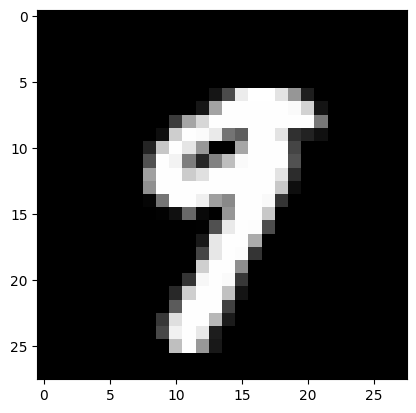

Prediction:  [1]
Label:  1


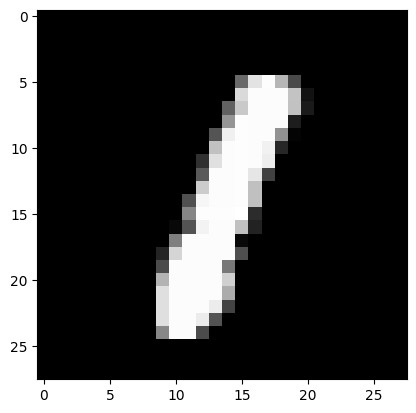

Prediction:  [9]
Label:  7


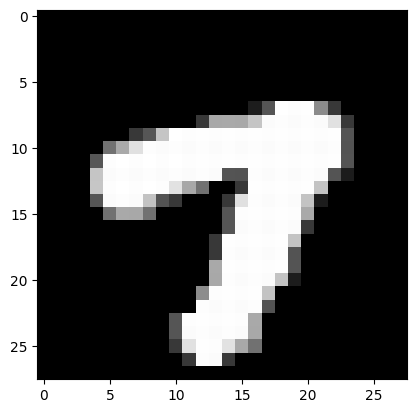

In [72]:
test_pred(1, W1, b1, W2, b2)
test_pred(4, W1, b1, W2, b2)
test_pred(7, W1, b1, W2, b2)